# Embedding Layer Training Example v2 

In this case I will going to use a specialized layer from keras, the TextVectorization layer. A text preprocessing
layer that turns raw strings into an encoded representation that can be read by an Embedding layer or Dense layer. As it said in its page: https://www.tensorflow.org/guide/keras/preprocessing_layers

## Loading Data

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
df_spells = pd.read_csv("/kaggle/input/dndspells/dnd-spells.csv")
df_spells[:5]

,name,classes,level,school,cast_time,range,duration,verbal,somatic,material,material_cost,description
0,Acid Splash,"Artificer, Sorcerer, Wizard",0,Conjuration,1 Action,60 Feet,Instantaneous,1,1,0,NaN,You hurl a bubble of acid. Choose one creature...
1,Blade Ward,"Bard, Sorcerer, Warlock, Wizard",0,Abjuration,1 Action,Self,1 round,1,1,0,NaN,You extend your hand and trace a sigil of ward...
2,Booming Blade,"Artificer, Sorcerer, Warlock, Wizard",0,Evocation,1 Action,Self (5-foot radius),1 round,0,1,1,a melee weapon worth at least 1 sp,You brandish the weapon used in the spell’s ca...
3,Chill Touch,"Sorcerer, Warlock, Wizard",0,Necromancy,1 Action,120 Feet,1 round,1,1,0,NaN,"You create a ghostly, skeletal hand in the spa..."
4,Control Flames,"Druid, Sorcerer, Wizard",0,Transmutation,1 Action,60 Feet,Instantaneous or 1 hour,0,1,0,NaN,You choose nonmagical flame that you can see w...


## Data Exploration

In [3]:
df_spells.loc[:,['school','description']].groupby(by=["school"]).count()

,description
school,
Abjuration,57
Conjuration,102
Divination,38
Enchantment,57
Evocation,115
Illusion,34
Necromancy,40
Transmutation,111


In [4]:
print("there is " + str(len(df_spells)) + " spells in this dataset from DnD")

there is 554 spells in this dataset from DnD


In [5]:
import spacy
npl = spacy.load('en_core_web_sm')

In [6]:
def count_words(x):
    y = npl(x)
    return len(y)

In [7]:
df_spells["count_tokens"] = df_spells.apply(lambda x: count_words(x['description']),axis=1)
df_spells["count_tokens"][:5]

0     77
1     38
2    140
3    128
4    175
Name: count_tokens, dtype: int64

In [8]:
df_spells.describe()

,level,verbal,somatic,material,count_tokens
count,554.000000,554.000000,554.000000,554.000000,554.000000
mean,3.525271,0.945848,0.862816,0.523466,165.189531
std,2.470128,0.226521,0.344353,0.499900,112.745654
min,0.000000,0.000000,0.000000,0.000000,11.000000
25%,1.000000,1.000000,1.000000,0.000000,90.250000
50%,3.000000,1.000000,1.000000,1.000000,138.500000
75%,5.000000,1.000000,1.000000,1.000000,199.500000
max,9.000000,1.000000,1.000000,1.000000,800.000000


## Using TextVectorization to create an input X

In [9]:
df_spells["input_x"] = df_spells.apply(lambda x: x['description'],axis=1)
df_spells["input_x"][:5]

0    You hurl a bubble of acid. Choose one creature...
1    You extend your hand and trace a sigil of ward...
2    You brandish the weapon used in the spell’s ca...
3    You create a ghostly, skeletal hand in the spa...
4    You choose nonmagical flame that you can see w...
Name: input_x, dtype: object

In [10]:
import tensorflow as tf

In [11]:
text_vectorization_layer = tf.keras.layers.TextVectorization(
 standardize="lower_and_strip_punctuation",
 output_mode='int',
output_sequence_length=800)

2022-10-01 06:58:43.097121: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [12]:
text_vectorization_layer.adapt(df_spells['description'])

2022-10-01 06:58:43.215339: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


In [13]:
#checking what will happen when a sentence pass by this layer
df_spells['one_hot'] = df_spells.apply(lambda x: text_vectorization_layer(x['description']),axis=1)
print("Shape " + str(df_spells['one_hot'][10].shape))
df_spells['one_hot'][0]

Shape (800,)


<tf.Tensor: shape=(800,), dtype=int64, numpy=
array([   4,  817,    3, 4240,    5,  261,   57,   38,   11,   24,   42,
          7,   57,  167,   50,   24,   42,   15,   58,   24,   84,   32,
          5,   29,   70,    3,   18,   36,  109,   12,    3,  113,   34,
         40,    7,  102,  140,  261,   22,   30,   33,   62,   21,   92,
         22,   77,   28,  140,   26,    4,  190,  143,   31,  306,  371,
         31,  390,    9,  370,   31,  491,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
     

In [14]:
print("We have " + str(len(text_vectorization_layer.get_vocabulary())) + " terms as vocabulary")

We have 4504 terms as vocabulary


## Creating input Y

In [15]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(df_spells['school'])
print('Labels: ', label_encoder.classes_)

def label_encode(labels,encoder):
    encoding = encoder.transform(labels)
    return tf.keras.utils.to_categorical(encoding,len(encoder.classes_))


def label_decode(labels,decoder):
    decoding = np.argmax(labels, axis=1)
    return decoder.inverse_transform(decoding)

Labels:  ['Abjuration' 'Conjuration' 'Divination' 'Enchantment' 'Evocation'
 'Illusion' 'Necromancy' 'Transmutation']


In [16]:
input_y = label_encode(df_spells.school,label_encoder)
input_y[:5]

array([[0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

## Modeling

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Embedding,Dense

In [18]:
model = Sequential()
regularizer = tf.keras.regularizers.l1_l2(0, 0.001)

model.add(tf.keras.Input(shape=(1,), dtype=tf.string))
model.add(text_vectorization_layer)
embedding_layer = Embedding(input_dim=4504,output_dim=64,input_length=800)
model.add(embedding_layer)
model.add(Flatten())
model.add(Dense(640,kernel_regularizer=regularizer,activation='relu'))
model.add(Dense(64,kernel_regularizer=regularizer,activation='relu'))
model.add(Dense(64,kernel_regularizer=regularizer,activation='relu'))
model.add(Dense(8,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
text_vectorization (TextVect (None, 800)               0         
_________________________________________________________________
embedding (Embedding)        (None, 800, 64)           288256    
_________________________________________________________________
flatten (Flatten)            (None, 51200)             0         
_________________________________________________________________
dense (Dense)                (None, 640)               32768640  
_________________________________________________________________
dense_1 (Dense)              (None, 64)                41024     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 5

In [19]:
history = model.fit(df_spells['input_x'],input_y,batch_size=32, epochs=15,verbose=0,validation_split=0.2, shuffle=True)

## Visualization

In [20]:
import matplotlib.pyplot as plt

def training_plot(metrics, history):
    f, ax = plt.subplots(1, len(metrics), figsize=(5 * len(metrics), 5))
    for idx, metric in enumerate(metrics):
        ax[idx].plot(history.history[metric], ls='dashed')
        ax[idx].set_xlabel("Epochs")
        ax[idx].set_ylabel(metric)
        ax[idx].plot(history.history['val_' + metric])
        ax[idx].legend([metric, 'val_' + metric])

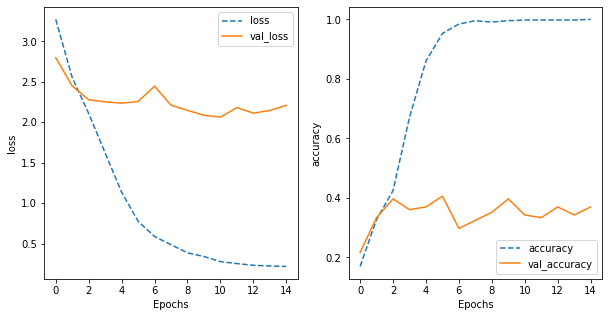

In [21]:
training_plot(['loss', 'accuracy'], history)

## Evaluation and Final Thoughts

There is a small improving of the last example, but overall, we have the same result. However, it is important to remember that our dataset contains imbalanced data between categories. For a better result will be necessary utilizing methods to balance the data.